<a href="https://colab.research.google.com/github/LuisGD44/Cliente-servidor5A/blob/master/Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("/content/datosMoneda.csv", parse_dates=['Fecha'])

In [ ]:
# Ordenar el índice de fechas
data = data.sort_index()

In [ ]:
# Dividir los datos en entrenamiento y prueba
train_df = data[:-700] # Todos los datos excepto los últimos 30 días
test_df = data[-700:] # Últimos 30 días

In [ ]:
# Entrenar el modelo SARIMA
modelo_sarima = SARIMAX(train_df['Precio'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
resultado_sarima = modelo_sarima.fit(disp=False)

In [ ]:
predicciones = resultado_sarima.predict(start=test_df.index[0], end=test_df.index[-1])


In [ ]:
media_entrenamiento = train_df['Precio'].mean()
predicciones_sin_nan = predicciones.fillna(media_entrenamiento)
test_df_sin_nan = test_df.loc[predicciones_sin_nan.index, 'Precio']


In [ ]:
r2 = r2_score(test_df_sin_nan, predicciones_sin_nan)
print('Coeficiente de determinación (R^2):', r2 * r2)

Coeficiente de determinación (R^2): 128.3528599829044


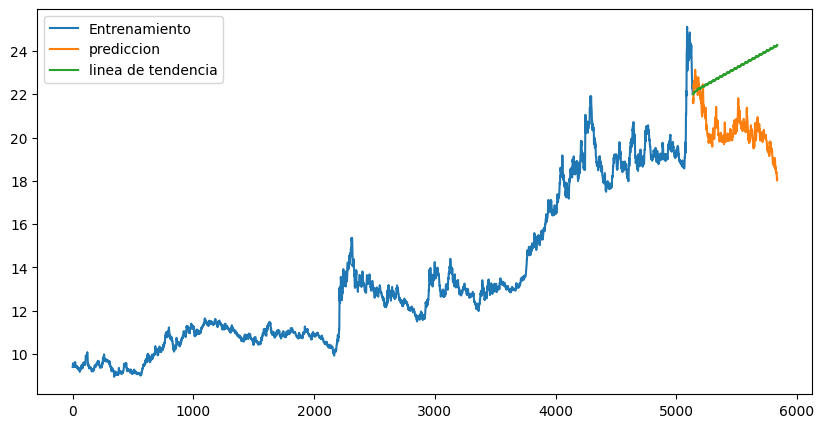

In [ ]:
# Graficar los datos reales y las predicciones
plt.figure(figsize=(10, 5))
plt.plot(train_df.index, train_df['Precio'], label='Entrenamiento')
plt.plot(test_df_sin_nan.index, test_df_sin_nan, label='prediccion')
plt.plot(predicciones_sin_nan.index, predicciones_sin_nan, label='linea de tendencia')
plt.legend()
plt.show()